In [1]:
#menghubungkan colab dengann gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#memanggil file dataset
path = "/content/gdrive/MyDrive/Praktikum_MachineLearning/Praktikum04"

In [3]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)

In [4]:
#membaca file csv menggunakan pandas (pd)
df = pd.read_csv(path + "/data/calonpembelimobil.csv")
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [5]:
#melihat informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [7]:
#cek missing value
df.isnull().sum()

,0
ID,0
Usia,0
Status,0
Kelamin,0
Memiliki_Mobil,0
Penghasilan,0
Beli_Mobil,0


**Data Pre-Processing**

In [8]:
#mengecek baris data duplikat
df.duplicated().sum()

np.int64(0)

In [9]:
#mengecek nilai unik
df['Kelamin'].unique()

array([0, 1])

In [10]:
df['Beli_Mobil'].unique()

array([1, 0])

In [17]:
#hasil pemeriksaan distribusi data
print("Distribusi Kelamin:\n", df['Kelamin'].value_counts())
print("\nDistrubusi Beli Mobil:\n", df['Beli_Mobil'].value_counts())

Distribusi Kelamin:
 Kelamin
0    519
1    481
Name: count, dtype: int64

Distrubusi Beli Mobil:
 Beli_Mobil
1    633
0    367
Name: count, dtype: int64


In [12]:
#mencari Korelasi
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
ID,1.000000,0.149779,-0.006634,0.014646,0.068555,0.254177,0.168614
Usia,0.149779,1.000000,0.051476,0.019454,0.090926,0.125859,0.100127
Status,-0.006634,0.051476,1.000000,-0.008561,0.048302,0.071714,0.048584
Kelamin,0.014646,0.019454,-0.008561,1.000000,0.035199,-0.054211,-0.147301
Memiliki_Mobil,0.068555,0.090926,0.048302,0.035199,1.000000,0.137823,0.102005
Penghasilan,0.254177,0.125859,0.071714,-0.054211,0.137823,1.000000,0.763930
Beli_Mobil,0.168614,0.100127,0.048584,-0.147301,0.102005,0.763930,1.000000


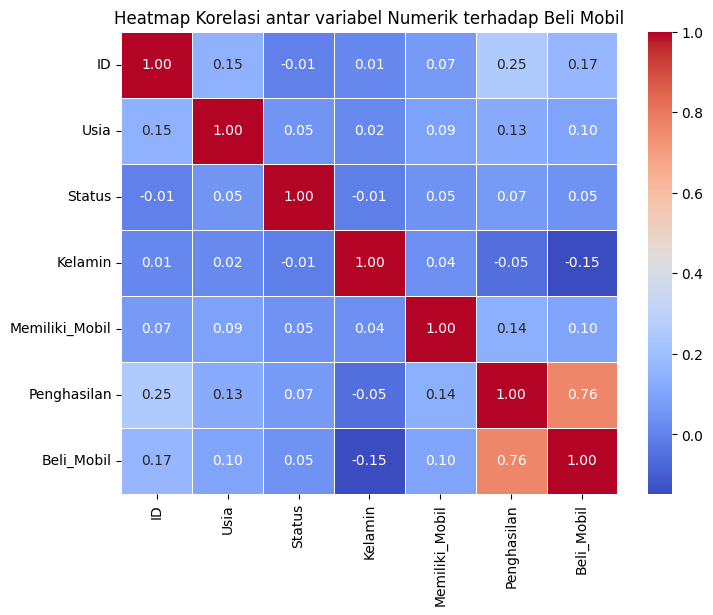

In [13]:
#visualisasi heatmap korelasi
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi antar variabel Numerik terhadap Beli Mobil')
plt.show()

**Pembagian Dataset**

In [19]:
#fitur numerik dan gender
feature_num = ['Usia', 'Memiliki_Mobil', 'Penghasilan']
feature_bin = ['Kelamin']

#gabungkan dan drop missing
use_cols = feature_num + feature_bin + ['Beli_Mobil']
df_model = df[use_cols].dropna().copy()

X = df_model[feature_num + feature_bin]
y = df_model['Beli_Mobil']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1000, 4)
y shape: (1000,)


In [21]:
#pembagian data training dan data test
X_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Data Training:", X_train.shape)
print("Data Testing:", x_test.shape)

Data Training: (800, 4)
Data Testing: (200, 4)


**Membangun Model**

In [22]:
#scale hanya fitur numerik, gender langsung passthrough
preprocess =  ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), feature_num),
        ('bin', 'passthrough', feature_bin)
    ],
    remainder='drop'
)

model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced',
    random_state=42
)

clf = Pipeline([('preprocess', preprocess),('model', model)])

#latih model
clf.fit(X_train, y_train)
print("Pembeli mobil tersebut sudah membeli mobil.")

Pembeli mobil tersebut sudah membeli mobil.


In [24]:
#prediksi dan probabilitas
y_pred = clf.predict(x_test)
y_prob = clf.predict_proba(x_test)[:, 1]

#hitung Metrik Evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print (f"Akurasi: {accuracy_score(y_test, y_pred):4f}")
print (f"Presisi: {precision_score(y_test, y_pred, zero_division=0):4f}")
print (f"Recall: {recall_score(y_test, y_pred, zero_division=0):4f}")
print (f"F1 Score: {f1_score(y_test, y_pred, zero_division=0):4f}")
print (f"ROC AUC Score: {roc_auc_score(y_test, y_prob):4f}")

Akurasi: 0.915000
Presisi: 0.961240
Recall: 0.911765
F1 Score: 0.935849
ROC AUC Score: 0.964844


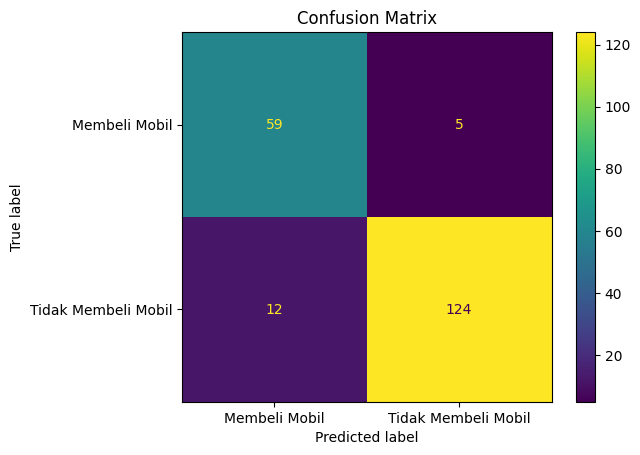

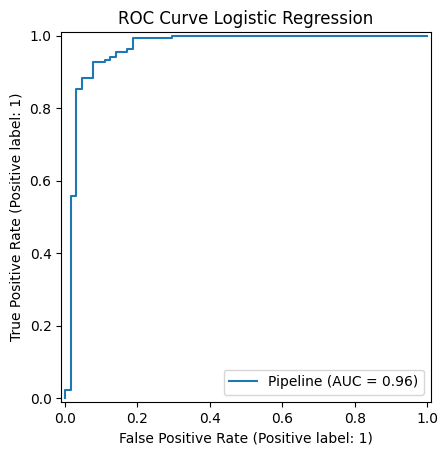

In [25]:
#confusion matrix
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, y_pred),
    display_labels=['Membeli Mobil', 'Tidak Membeli Mobil']
).plot(values_format='d')

plt.title('Confusion Matrix')
plt.show()

#ROC curve
RocCurveDisplay.from_estimator(clf, x_test, y_test)
plt.title('ROC Curve Logistic Regression')
plt.show()

In [26]:
from sklearn.metrics import classification_report

#classification report
print(classification_report(y_test, y_pred, target_names=['Tidak Membeli Mobil (0)', 'Membeli Mobil (1)']))

                         precision    recall  f1-score   support

Tidak Membeli Mobil (0)       0.83      0.92      0.87        64
      Membeli Mobil (1)       0.96      0.91      0.94       136

               accuracy                           0.92       200
              macro avg       0.90      0.92      0.90       200
           weighted avg       0.92      0.92      0.92       200



In [27]:
from sklearn.model_selection import cross_val_score

#cross validation
scores = cross_val_score(clf, X, y, cv=5)

#tampilkan hasil
print("Scor tiap fold:", scores)
print("Rata-rata akurasi:", np.mean(scores))
print("Standar deviasi:", np.std(scores))

Scor tiap fold: [0.775 0.915 0.955 0.945 0.94 ]
Rata-rata akurasi: 0.9059999999999999
Standar deviasi: 0.06681317235396023


In [28]:
#ambil nama fitur dan koefisien
feat_names = feature_num + feature_bin
coefs = clf.named_steps['model'].coef_[0]
odds = np.exp(coefs)

coef_df = pd.DataFrame({
    'Fitur': feat_names,
    'Koefisien (log-odds)': coefs,
    'Odds Ratio (e^coef)': odds
}).sort_values(by='Odds Ratio (e^coef)', ascending=False)

print(coef_df)

            Fitur  Koefisien (log-odds)  Odds Ratio (e^coef)
2     Penghasilan              4.761652           116.938911
1  Memiliki_Mobil              0.130913             1.139868
0            Usia             -0.114974             0.891389
3         Kelamin             -1.142039             0.319167


**Data Baru**

In [29]:
# Contoh 2 calon pembeli mobil
data_baru = pd.DataFrame({
    'Usia': [30, 45],
    'Memiliki_Mobil': [0, 1],     # 0 = Belum punya, 1 = Sudah punya
    'Penghasilan': [7.5, 15.0],   # semisal dalam juta rupiah
    'Kelamin': [1, 0]             # 1 = Laki-laki, 0 = Perempuan
})

# Prediksi menggunakan model yang sudah dilatih
pred = clf.predict(data_baru)
prob = clf.predict_proba(data_baru)[:, 1]

# Gabungkan hasil ke dalam DataFrame
hasil = data_baru.copy()
hasil['Prob_Membeli'] = prob
hasil['Pred (0=Tidak, 1=Ya)'] = pred

display(hasil)


,Usia,Memiliki_Mobil,Penghasilan,Kelamin,Prob_Membeli,"Pred (0=Tidak, 1=Ya)"
0,30,0,7.5,1,0.000008,0
1,45,1,15.0,0,0.000039,0
